
<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="780" height="140" align="center"/>

<p align="right">Curso: Programación Para el Analisis de datos</p>

<p align="center"> Código Curso: 203008069 </p>

<p align="center"> Grupo: 13 </p>

 <p align="center"> Tarea 1 - Principios básicos de programación científica</p>

 <p align="center">  Presentado por: Juan José García Sánchez</p>

<p align="center"> Código: 1005095836</p>

 <p align="center"> Tutor(a): Miguel Angel Vargas Valencia </p>

 <p align="center"> 01/10/2024</p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA </p>



# Importar paquetes de datos relevantes

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Ejercicio 1: Estructuras Básicas de Datos con Python

En el fragmento de codigo siguiente, se define la estructura con datos sobre mis familiares. esta se conforma con llaves conteniendo el nombre y apellido separados de coma, y con valores siendo tuplas conteniendo en orden: edad, peso, altura, y si se encuentra estudiando alguna carrera o no.

In [5]:
#formato de los datos: 
#familiares (llaves): "nombre,apellido"
#informacion: (edad (años), peso(kg), altura(metros), estudia(booleano))

info_familiares = {
    "Sebastia,Garcia":(22, 68, 1.85, False), # hermano medio
    "Pablo,Garcia":   (18, 70, 1.72, True),  # hermano menor
    "Marleny,Alvarez":(72, 80, 1.60, False), # abuela materna
    "Arnoldo,Sanchez":(80, 78, 1.72, False), # abuela materno
    "Cielo,Sanchez":  (54, 54, 1.60, False), # madre
    "Carlos,Garcia":  (50, 68, 1.72, False), # padre
    "Andrew,Garcia":   (30, 80, 1.72, False), # hermanastro paterno
    "Luz,Hernandez":  (60, 70, 1.65, False)  # tia paterna
}

## Definir funcion promedio

Funcion simple, que toma una variable de datos como una lista, y despues calcula un promedio simple.

In [6]:
def promedio(datos: list[float|int]):
    """
    Calcula promedio de iterables numericos, generalmente listas
    """
    return sum(datos) / len(datos)

## Mostrando estadisticas

El ejercicio se puede realizar por medio de iteración o de comprensiones de listas. En este caso, se realizara por medio de iteraciones, ya que se entiende mas facilmente.
se crea un diccionario con listas sin elementos. Esto facilita la identificacion de que promedios se calculand despues.

Se itera sobre el diccionario de info_familiares una vez para extraer los datos en las listas relevantes dentro del diccionario. Despues, con el agregado de los datos, se itera y calcula los promedios correspondientes a las variables numericas.

In [16]:
#estructura de datos donde se depositan los datos.
agregados = { 
    "edades" : list(),
    "pesos" : list(),
    "alturas" : list(),
    "esta_estudiando" : list()
}

#iterar sobre informacion de familiares, para aplanar los datos en las listas.
for edad, peso, altura, estudia in info_familiares.values():
    agregados["edades"].append(edad)
    agregados["pesos"].append(peso)
    agregados["alturas"].append(altura)
    agregados["esta_estudiando"].append(estudia)

#calculando finalmente los promedios de los datos
for variable, conjunto in agregados.items():
    pro = promedio(conjunto)

    #se imprime el nombre de la variable, concatenando espacios para alinear todos los nombres
    print(f"el promedio de {variable:<7} en mi grupo familiar: {pro:.2f}")


el promedio de edades  en mi grupo familiar: 48.25
el promedio de pesos   en mi grupo familiar: 71.00
el promedio de alturas en mi grupo familiar: 1.70
el promedio de esta_estudiando en mi grupo familiar: 0.12


## Conclusiones:

las edades en recolectadas son variadas: hay personas jovenes, de mediana edad y adultos mayores. Esto explica que la edad promedio sea de 48.25 años, ya que se intenta equilibrar entre los extremos. El promedio de altura se ve sesgado por la altura de los hombres, ya que hay mas (5) que las mujeres. Este Tambien esta algo por encima del promedio de altura colombiano para los hombres (1.69) *(Roser et al., 2024)*. 

El promedio de peso es bastante alto, acercandose a los 100 kg. Esto sugiere que se deben hacer más analisis para evaluar la salud de la muestra de personas. El promedio calculado para el estatus de estudio no tiene sentido. El lenguaje permite usar booleanos como números, ya que son subclases de la clase Entero (int) en python, pero la variable es categorica, y no se le deberia calcular el promedio.

# Ejercicio 2: Estructuras de Datos y DataFrames

## Carga de bases de datos

In [17]:
# cargando datos de las atenciones medicas anexo 1
df1: pd.DataFrame = pd.read_csv("base_atenciones_medicas.csv", delimiter=";")

#cargando datos de vivienda del anexo 2
df2: pd.DataFrame = pd.read_csv("Anexo 2 - Base de Datos CSV.csv")

#cargando datos del cancer de pecho de sklearn
datos_cancer = load_breast_cancer(as_frame=True)
df3: pd.DataFrame = datos_cancer.data

## Definir funciones muestran propiedades de las bases

Se definieron dos funciones: una para mostrar los campos de todos los datasets en el panel, y otra para imprimir el numero de elementos en los datasets, dividiendolos en registros y campos.

El manejo de DataFrames se obtuvo de *(Kane, 2017)*


In [9]:
# se definen las funciones del ejercicio

def mostrar_campos(panel: dict[pd.DataFrame]):
    """
    imprime los campos de todas las bases de datos en el panel.
    """
    for nombre, datos in panel.items():
        print(f"Mostrando datos para: {nombre}")
        
        print(f"\t{list(datos.columns)}", "\n")

def mostrar_cantidad(panel: dict[pd.DataFrame]):
    """
    imprime la cantidad de registros y campos de todas las bases del panel
    """
    mayor_nombre = len(max((key for key in panel.keys()), key=len)) + 2
    
    for nombre, datos in panel.items():
        num_registros, num_campos = datos.shape

        nombre = f"'{nombre}'"
        
        print(f"para base {nombre: <{mayor_nombre}} -> registros : {num_registros}, campos: {num_campos}")
    

## Definir el panel

In [10]:
panel = {
    "atencion_medica":df1,
    "vivenda":df2,
    "cancer_pecho":df3
}

## Extrayendo campos del panel

In [11]:
mostrar_campos(panel)

Mostrando datos para: atencion_medica
	['Empresa', 'Turno', 'Día de la semana', 'Experiencia del conductor', 'Formación del Paramédico', 'Nivel del Paramédico', 'Cantidad de atenciones', 'Distancia recorrida (Km)', 'Velocidad máxima (Km/h)', 'Consumo de combustible (Galones)', 'Tiempo en Movimiento (h)', 'Tiempo motor ON (h)'] 

Mostrando datos para: vivenda
	['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'] 

Mostrando datos para: cancer_pecho
	['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'wors

## Extrayendo Tamaños de bases del panel

In [12]:
mostrar_cantidad(panel)

para base 'atencion_medica' -> registros : 2200, campos: 12
para base 'vivenda'         -> registros : 3000, campos: 9
para base 'cancer_pecho'    -> registros : 569, campos: 30


## Cantidad de elementos que se refieren a la empresa TAC

In [13]:
empresa = "TAC"

datos_empresa_tac = df1[df1["Empresa"] == empresa]

print(f"registros encontrados con la empresa '{empresa}' : {datos_empresa_tac.shape[0]}" )


registros encontrados con la empresa 'TAC' : 596


## Cantidad de elementos nulos en la base de datos sobre viviend, por campos

In [14]:
print("Las cantidad de elementos nulos en la base de vivienda, por campo:")

# se hallan los registros nulos y se suman sobre los campos del dataset
nulos = df2.isnull().sum()

print(nulos)

Las cantidad de elementos nulos en la base de vivienda, por campo:
longitude             0
latitude              5
housing_median_age    1
total_rooms           1
total_bedrooms        1
population            3
households            2
median_income         2
median_house_value    0
dtype: int64


# Ejercicio 3: Gráficos científicos.

## Grafico 1:

Para hacer el grafico, se uso la interfaz orientada a objetos de *Matplotlib* ya que es mas facil de usar para casos en los que se necesita mucha personalización. 

Por medio de la funcion ```plt.figure``` se obtuvo un canvas en blanco de tipo ```Figure```, y de este se obtuvo un objeto ```ax``` de tipo ```Axes``` usando ```add_subplot```, que agrega un plano de coordenadas unico al grafico. el objeto ```Axes```  permite controlar que se grafica, los titulos, y el estilo de los puntos y grafica. los titulos del eje y, eje x y de la grafica se colocaron mediante ```ax.set_xlabel```, ```ax.set_ylabel``` y ```ax.set_title```

- los puntos de dispersion se graficaron con la funcion de ```ax.scatter```
- Las funciones se graficaron con la funcion ```ax.plot```
- La apariencia se controló con los argumentos comunes de ```marker```, ```color```, y ```label```; para asignar el indicador, el color, y la leyenda de los puntos.

Las funciones ```ax.legend``` y ```plt.show``` agregan leyendas de las tendencias al grafico, y muestran el grafico terminado.

El uso de la interfaz orientada a objetos se obtuvo de *(Thakur, 2016)*

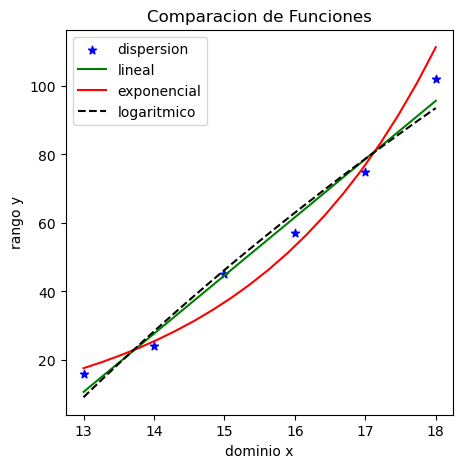

In [12]:
# graficando puntos de dispersion

x = [13, 14, 15, 16, 17, 18]
y = [16, 24, 45, 57 , 75, 102]

fig1 = plt.figure(figsize=(5,5))

ax = fig1.add_subplot(1, 1, 1)

ax.scatter(x, y, color="b", marker="*", label="dispersion")

# graficando la funcion lineal dada

rango = np.linspace(13,18, 20)

y_lineal = 17*rango - 210.3333

ax.plot(rango, y_lineal, "g-", label="lineal")

# graficando la funcion exponencial

y_exp = 0.1452*np.exp(0.369*rango)

ax.plot(rango, y_exp, "r-", label="exponencial")

# graficando la funcion logaritmica

y_log = 259.49*np.log(rango) - 656.46

ax.plot(rango, y_log, color="k", linestyle="--", label="logaritmico")

# fijar elementos extras del grafico

ax.set_title("Comparacion de Funciones")

ax.set_xlabel("dominio x")

ax.set_ylabel("rango y")

ax.legend()

# mostrar finalmente el grafico creado

plt.show()

## Analisis de tendencias

La gráfica representa los diferentes ajustes que se le podrian aplicar a los puntos de dispersión, usando varios modelos comunes. No se especifica los métodos usados para ajustar, pero se puede suponer que el ajuste por minimos cuadrados fue usado en  todos los casos. Graficamente, se puede ver que los mejores modelos serian el lineal o el logaritmico.

## Grafico 2: 

Para este caso, se uso la interfaz funcional de maplotlib, debido a las necesidades simples. se definen las variables globales para graficar y analisis.

In [13]:
## extrayendo variables para el analisis individualmente

tiempos_motor_encendido = df1["Tiempo motor ON (h)"]

tiempos_movimiento = df1["Tiempo en Movimiento (h)"]

### Histogramas

Se uso la funcion `plt.hist` para realizar los histogramas de los tiempos. Es el mas adecuado, dando que los tiempos son variables numericas continuas. 
No se calculó una cantidad de categorias para los datos, se uso por defecto las diez categorias dadas por numpy (la funcion `plt.hist` usa la funcion `hist` de numpy).
la transparencia se estableción en ambos graficos con el parametro ```alpha```, comun a todas las funciones de matplotlib.

El manejo de las funciones de graficacion de obtuvo de *(Thakur, 2016)*, y el uso de la funcion `hist` : [Referencia API pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

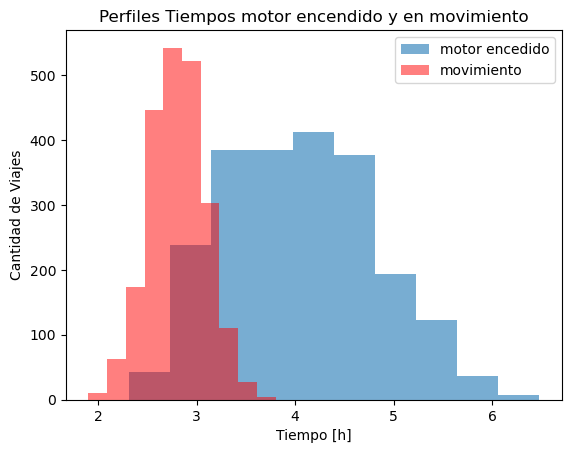

In [14]:
#graficando histograma del tiempo en el cual el motor estuvo encendido continuamente
plt.hist(tiempos_motor_encendido, alpha=0.6, label="motor encedido")

#graficando histograma del tiempo en el cual la ambulancia estuvo en movimiento
plt.hist(tiempos_movimiento, color="r", alpha=0.5, label="movimiento")

#ajustando titulos, mostrando leyendas y el grafico
plt.title("Perfiles Tiempos motor encendido y en movimiento")

plt.xlabel("Tiempo [h]")

plt.ylabel("Cantidad de Viajes")

plt.legend()

plt.show()

### Analisis de histogramas

Se puede ver que los graficos estan desplazados uno frente al otro, el de motor encendido frente al grafico de movimiento. Si los tiempos con el motor encendido y en movimiento fueran similares, ambos graficos deberian aproximadamente coincidir, por lo que, en general, las ambulancias pasan mas tiempo con el motor encendido, que en movimiento. Por observación, las ambulancias pasan hasta 3 horas de mas con el motor encendido que en movimiento. 

### Graficos de Dispersión

Se utiliza la funcion `scatter` para graficar la dispersion, de los datos de motor encendido vs. tiempo en movimiento. las funciones de `title`, `xlabel`, `ylabel` y `show` para colocar el titulo, nombre del eje x, eje y, y mostrar el grafico respectivamente

El uso del codigo se obtuvo de: *(Kane, 2017)*

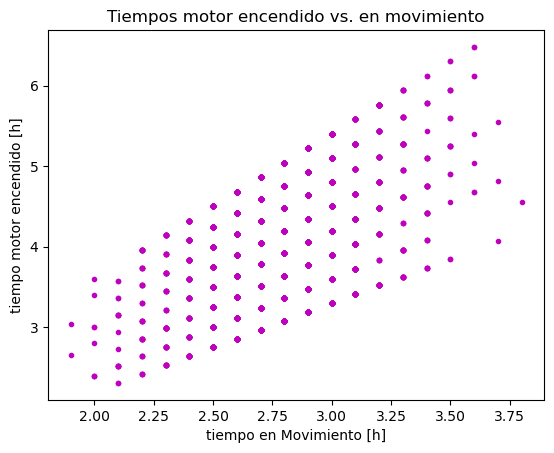

In [17]:
# imprimir grafico de dispersiones de tiempo encendio vs. tiempo en movimiento.
plt.scatter(tiempos_movimiento, tiempos_motor_encendido, color="m", marker=".")

plt.title("Tiempos motor encendido vs. en movimiento")

plt.xlabel("tiempo en Movimiento [h]")

plt.ylabel("tiempo motor encendido [h]")

plt.show()

### Analisis del grafico de dispersion:


En el gráfico de tendencia no se presenta como una linea unica, como normalmente se presentan las relaciones funcionales, ya que se estan graficando todas las empresas y turnos por igual. Se puede observar, que conforme aumente al tiempo en movimiento, tambien aumenta el tiempo que duro 
el motor encedido continuamente. Esto tiene sentido, ya que a más tiempo en movimento, mas distancia recorrida, y mas demanda al motor.

Se observan que las diferentes rectas que se forman son casi paralelas, por lo que se puede observar la relación entre el tiempo encendido y el tiempo en movimiento parece ser lineal. Esto muestra el tiempo desperdiciado con el motor encendido, sin movimiento, aumenta por cada hora, y no es nesariamente al azar. Esto puede mostrar malas practicas de los conductores, o que algun protocolo que se siga puede no ser adecuado para ahorrar tiempo en el motor.

# Referencias

- Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Packt
Publishing. (pp. 183-195).
- Roser, M., Appel, C., & Ritchie, H. (2024, January). Human Height. OurWorldInData. https://ourworldindata.org/human-height.
- Thakur, A. (2016). Python: Real-World Data Science. Packt
Publishing. (pp. 199 - 220).
